## Heap

É uma árvore binária em uma estrutura de array, precisa ter certas propriedades para ser considerada um heap.
Existe dois tipos de heaps:

* Min Heap
* Max Heap



**Características**:

- Todos tem filhos (direita, esquerda), tirando a última linha

**Quando usar**:

- Quando precisamos ter acesso aos 3 maiores e menores valores, ele pega em O(1)
- Para fazer um sort em um heap, ele faz em O(n log n)
- Você consegue transformar um array em um heap em O(n)
- Útil em filas prioritárias, schedulers, sempre quando os primeiros itens são desejados

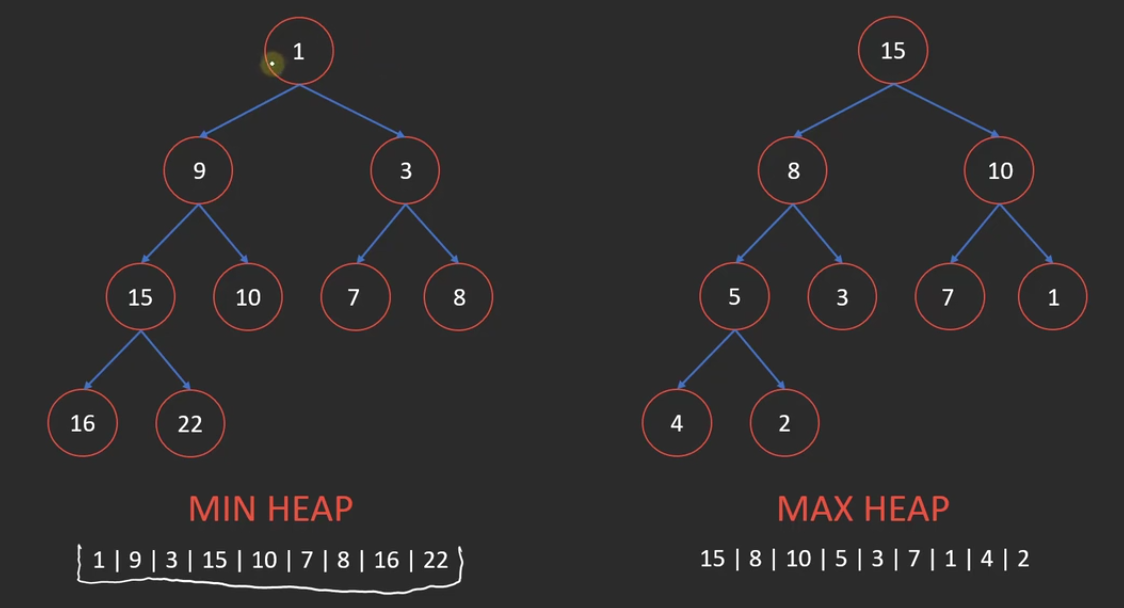

Para construir um heap, existe a formula:

> direita -> 2i + 1
> 
> esquerda -> 2i + 2

In [ ]:
import heapq

heap = [4,5,20,4,3,89,50,-2,405,43]

heapq.heapify(heap)

heap

[-2, 3, 20, 4, 4, 89, 50, 5, 405, 43]

In [ ]:
heapq.nlargest(3, heap)

[405, 89, 50]

In [ ]:
heapq.nsmallest(3, heap)

[-2, 3, 4]

In [ ]:
heapq.heappush(heap, 20)
heap

[-2, 3, 20, 4, 4, 89, 50, 5, 405, 43, 20]

In [ ]:
heapq.heappop(heap)
heap

[3, 4, 20, 4, 20, 89, 50, 5, 405, 43]

In [ ]:
heapq.heappushpop(heap, 11)
heap

[4, 4, 20, 5, 20, 89, 50, 11, 405, 43]

In [ ]:
heap.sort()
heap

[4, 4, 5, 11, 20, 20, 43, 50, 89, 405]

### Implementando o Heap

In [ ]:
class MaxHeap:
    def __init__(self, array):
        self.heap = self.heapify(array)


    def heapify(self, array):
        parent_index = (len(array) - 2) // 2
        for current_index in reversed(range(parent_index + 1)):
            self.sift_down(current_index, len(array) - 1, array)
        return array


    def peek(self):
        return self.heap[0]


    def sift_up(self, current_index):
        parent_index = (current_index - 1) // 2
        while current_index > 0 and self.heap[current_index] > self.heap[parent_index]:
            self.swap(current_index, parent_index, self.heap)
            current_index = parent_index

            parent_index = (current_index - 1) // 2


    def sift_down(self, current_index, end_index, heap):
        left_child_index = (2 * current_index) + 1
        while left_child_index <= end_index:
            right_child_index = (2 * current_index) + 2

            child_to_swap = left_child_index
            if right_child_index < len(heap) and heap[left_child_index] < heap[right_child_index]:
                child_to_swap = right_child_index

            if child_to_swap >= len(heap):
                break

            if heap[child_to_swap] < heap[current_index]:
                break
            else:
                self.swap(current_index, child_to_swap, heap)

            current_index = child_to_swap
            left_child_index = (2 * current_index) + 1


    def remove(self):
        self.swap(0, len(self.heap) - 1, self.heap)
        value_to_return = self.heap.pop()
        self.sift_down(0, len(self.heap) - 1, self.heap)
        return value_to_return


    def insert(self, value):
        self.heap.append(value)
        self.sift_up(len(self.heap) - 1)


    def swap(self, first_index, second_index, heap):
        heap[first_index], heap[second_index] = heap[second_index], heap[first_index]
            


In [ ]:
max_heap = MaxHeap([48,12,24,7,8,-5,24,391,24,56,2,6,8,41])
max_heap.insert(76)
max_heap.remove()
max_heap.remove()
max_heap.insert(87)
max_heap.heap

[87, 48, 56, 24, 24, 8, 41, 7, 12, 8, 2, 6, -5, 24]